In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pylab as plt

In [9]:
our_color_palette = {"WT": "#F2C14E", # yellow
                     "W": "#F2C14E", # yellow
                     "IP": "#79ADDC", # blue
                     "I": "#79ADDC", # blue
                     "KO": "#B279A7", # purple
                     "K": "#B279A7", # purple
                    } 
treatments_list = ["WT", "IP", "KO"]
passages_list = ["p1", "p2", "p3", "p5", "p10"]
replicates_list = ['a', 'b', 'c']

gt_mapper = {"I":"IP", "K":"KO", "W":"WT", "parental": "parental"}

In [7]:
fname = "all_mutations.annotated.filtered.csv"
df = pd.read_csv(fname)

In [10]:
df['genotype'] = df['file'].str.split("/").str[2].str.split("_").str[0]
df['rep'] = df['file'].str.split("/").str[2].str.split("_").str[2]
df['passage'] = df['file'].str.split("/").str[2].str.split("_").str[1].str.split("p").str[1]
df['passage'] = df['passage'].astype(int)
df['n_var'] = df['Rvar'] + df['Fvar']
df['n_tot'] = df['Rtot'] + df['Ftot']
df['frequency'] = df['n_var'] / df['n_tot']
df['position'] = df['POS'] 
df['mutation'] = df['REF'] + df['POS'].astype(str) + df['ALT'] + " (" + df['AminoAcidChange']+")"

df['genotype'] = df['genotype'].apply(lambda x: gt_mapper[x])

In [11]:
# rename parental
df.loc[df['sample']=="parental_p0_vs_p0", "genotype"]='0_parental'
df.loc[df['sample']=="parental_p0_vs_p0", "rep"]='_'
df.loc[df['sample']=="parental_p0_vs_p0", "passage"]='p0'

## filter for crpv

In [12]:
virus = 'crpv'

df = df[df['virus']==virus]

## check for some mutations of interest

In [13]:
df.loc[df['sample']=="parental_p0_vs_p0"].sort_values('frequency').tail(10)

,Unnamed: 0,CHROM,POS,REF,ALT,QUAL,virus,file,Fvar,Rvar,...,sample,windows_pass_posterior,windows_covering_positions,genotype,rep,passage,n_tot,frequency,position,mutation
123,474,NC_003924.1,4045,C,A,100.000000,crpv,results/crpv/parental_p0_vs_p0/snvs.annotated.vcf,392.0,398.0,...,parental_p0_vs_p0,3.0,3,0_parental,_,p0,37134.0,0.021274,4045,C4045A (R1113S)
146,551,NC_003924.1,4619,C,A,100.000000,crpv,results/crpv/parental_p0_vs_p0/snvs.annotated.vcf,265.0,319.0,...,parental_p0_vs_p0,3.0,3,0_parental,_,p0,27156.0,0.021505,4619,C4619A (T1304N)
77,311,NC_003924.1,2760,G,A,100.000000,crpv,results/crpv/parental_p0_vs_p0/snvs.annotated.vcf,498.0,535.0,...,parental_p0_vs_p0,3.0,3,0_parental,_,p0,32002.0,0.032279,2760,G2760A (K684K)
62,249,NC_003924.1,2138,C,T,100.000000,crpv,results/crpv/parental_p0_vs_p0/snvs.annotated.vcf,2602.0,553.0,...,parental_p0_vs_p0,3.0,3,0_parental,_,p0,97647.0,0.032310,2138,C2138T (T477I)
14,70,NC_003924.1,775,C,A,100.000000,crpv,results/crpv/parental_p0_vs_p0/snvs.annotated.vcf,524.0,523.0,...,parental_p0_vs_p0,3.0,3,0_parental,_,p0,32003.0,0.032716,775,C775A (Q23K)
231,1005,NC_003924.1,8479,C,A,100.000000,crpv,results/crpv/parental_p0_vs_p0/snvs.annotated.vcf,541.0,710.0,...,parental_p0_vs_p0,3.0,3,0_parental,_,p0,35032.0,0.035710,8479,C8479A (P755T)
170,667,NC_003924.1,5619,C,A,110.072737,crpv,results/crpv/parental_p0_vs_p0/snvs.annotated.vcf,1768.0,1917.0,...,parental_p0_vs_p0,3.0,3,0_parental,_,p0,30575.0,0.120523,5619,C5619A (I1637I)
236,1026,NC_003924.1,8749,C,A,80.076599,crpv,results/crpv/parental_p0_vs_p0/snvs.annotated.vcf,2198.0,2572.0,...,parental_p0_vs_p0,3.0,3,0_parental,_,p0,37910.0,0.125824,8749,C8749A (H845N)
240,1047,NC_003924.1,8856,T,A,100.000000,crpv,results/crpv/parental_p0_vs_p0/snvs.annotated.vcf,2472.0,1949.0,...,parental_p0_vs_p0,3.0,3,0_parental,_,p0,33211.0,0.133119,8856,T8856A (F880L)
150,567,NC_003924.1,4786,C,A,100.000000,crpv,results/crpv/parental_p0_vs_p0/snvs.annotated.vcf,3544.0,3559.0,...,parental_p0_vs_p0,3.0,3,0_parental,_,p0,26525.0,0.267785,4786,C4786A (R1360R)


In [14]:
df[df['mutation'].str.startswith("A3892C")][
    ['mutation', 'genotype', 'passage', 'rep','frequency']].sort_values(['genotype', "passage", "rep"])

,mutation,genotype,passage,rep,frequency
20816,A3892C (R1062R),IP,1,a,0.149440
21230,A3892C (R1062R),IP,1,c,0.034823
23069,A3892C (R1062R),IP,2,b,0.064348
29795,A3892C (R1062R),IP,3,c,0.061605
26595,A3892C (R1062R),IP,5,a,0.078132
26942,A3892C (R1062R),IP,5,b,0.144062
28356,A3892C (R1062R),IP,10,a,0.055098
28943,A3892C (R1062R),IP,10,c,0.042600
20147,A3892C (R1062R),KO,1,a,0.111821
20616,A3892C (R1062R),KO,1,c,0.146678


In [15]:
df[df['mutation'].str.startswith("G1363A")][
    ['mutation', 'genotype', 'passage', 'rep','frequency']].sort_values(['genotype', "passage", "rep"])

,mutation,genotype,passage,rep,frequency
29443,G1363A (D219N),IP,3,b,0.001805
28282,G1363A (D219N),IP,10,a,0.001944
24258,G1363A (D219N),KO,3,a,0.000451
25038,G1363A (D219N),KO,5,a,0.430771
25766,G1363A (D219N),KO,10,a,0.999666
25982,G1363A (D219N),KO,10,b,0.997598
26228,G1363A (D219N),KO,10,c,0.826259
21394,G1363A (D219N),WT,2,a,0.003347
23487,G1363A (D219N),WT,3,a,0.000827
30046,G1363A (D219N),WT,5,a,0.205480


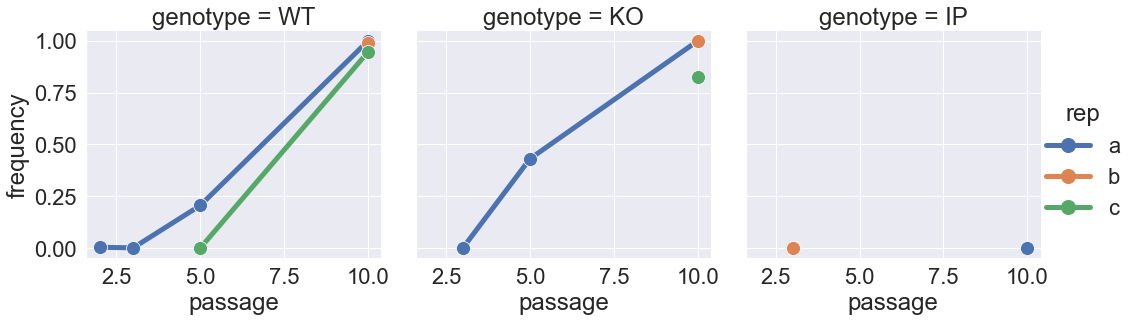

In [35]:
sns.set(font_scale=2)
sns.relplot(df[df['mutation'].str.startswith("G1363A")], 
             x='passage', 
            kind='line', 
             marker='o', 
             y='frequency', 
            col='genotype', 
            estimator=None,
            linewidth=5,
            markersize=14, 
            
            hue='rep', ) 
             

## write mutation frequency table

In [17]:
# Filtering for the heatmap plots
# filter out mutations that show never a frequency >= 0.1 in any sample
frequency_threshold = 0.01
df_temp = df[df['frequency']>=frequency_threshold]
high_freq_positions = df_temp['POS'].values

df_temp = df[df['POS'].isin(high_freq_positions)]
df_temp['frequency'] = df_temp['frequency'].astype(float).round(6)
mutation_order = df_temp.sort_values('position')['mutation'].unique()

df_temp.pivot_table(values='frequency', 
                                    index=[ 'genotype', 'passage', 'rep'], 
                                    columns='mutation', 
                                    aggfunc=np.max,
                                    #fill_value=0
                                   ).reindex(mutation_order, axis=1).to_csv(f"/Users/lfuhrmann/Downloads/{virus}_heatmap_freq0.01_P0.csv")

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_5787/3204286463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['frequency'] = df_temp['frequency'].astype(float).round(6)


## non-syn

In [18]:
#df = df[df['sample']!="parental_p0_vs_p0"]

df_NS = df[df['IsSynonymous']==0]

frequency_threshold = 0.01
df_temp = df[df['frequency']>=frequency_threshold]
high_freq_positions = df_temp['POS'].values

df_NS = df_NS[(df_NS['POS'].isin(high_freq_positions))]

In [19]:
# the two mutations that are now added with the parental stock
# C4045A and C4619A

df_NS[(df_NS['mutation'].str.startswith(('C4045A', 'C4619A'))) 
     ][['mutation', 'genotype', 'passage', 'rep','frequency']]

,mutation,genotype,passage,rep,frequency
123,C4045A (R1113S),0_parental,p0,_,0.021274
146,C4619A (T1304N),0_parental,p0,_,0.021505
19696,C4045A (R1113S),WT,1,b,0.000372
19925,C4045A (R1113S),WT,1,c,0.006147
19946,C4619A (T1304N),WT,1,c,0.005419
20387,C4619A (T1304N),KO,1,b,0.009273


In [20]:
mutation_order = df_NS.sort_values('position')['mutation'].unique()

df_heatmap = df_NS.pivot_table(values='frequency', 
                                    index=[ 'genotype', 'passage', 'rep'], 
                                    columns='mutation', 
                                    aggfunc=np.max,
                                    #fill_value=0
                                   ).reindex(mutation_order, axis=1)

positions = df_heatmap.columns.to_list()

In [10]:
df_heatmap.shape

(46, 155)

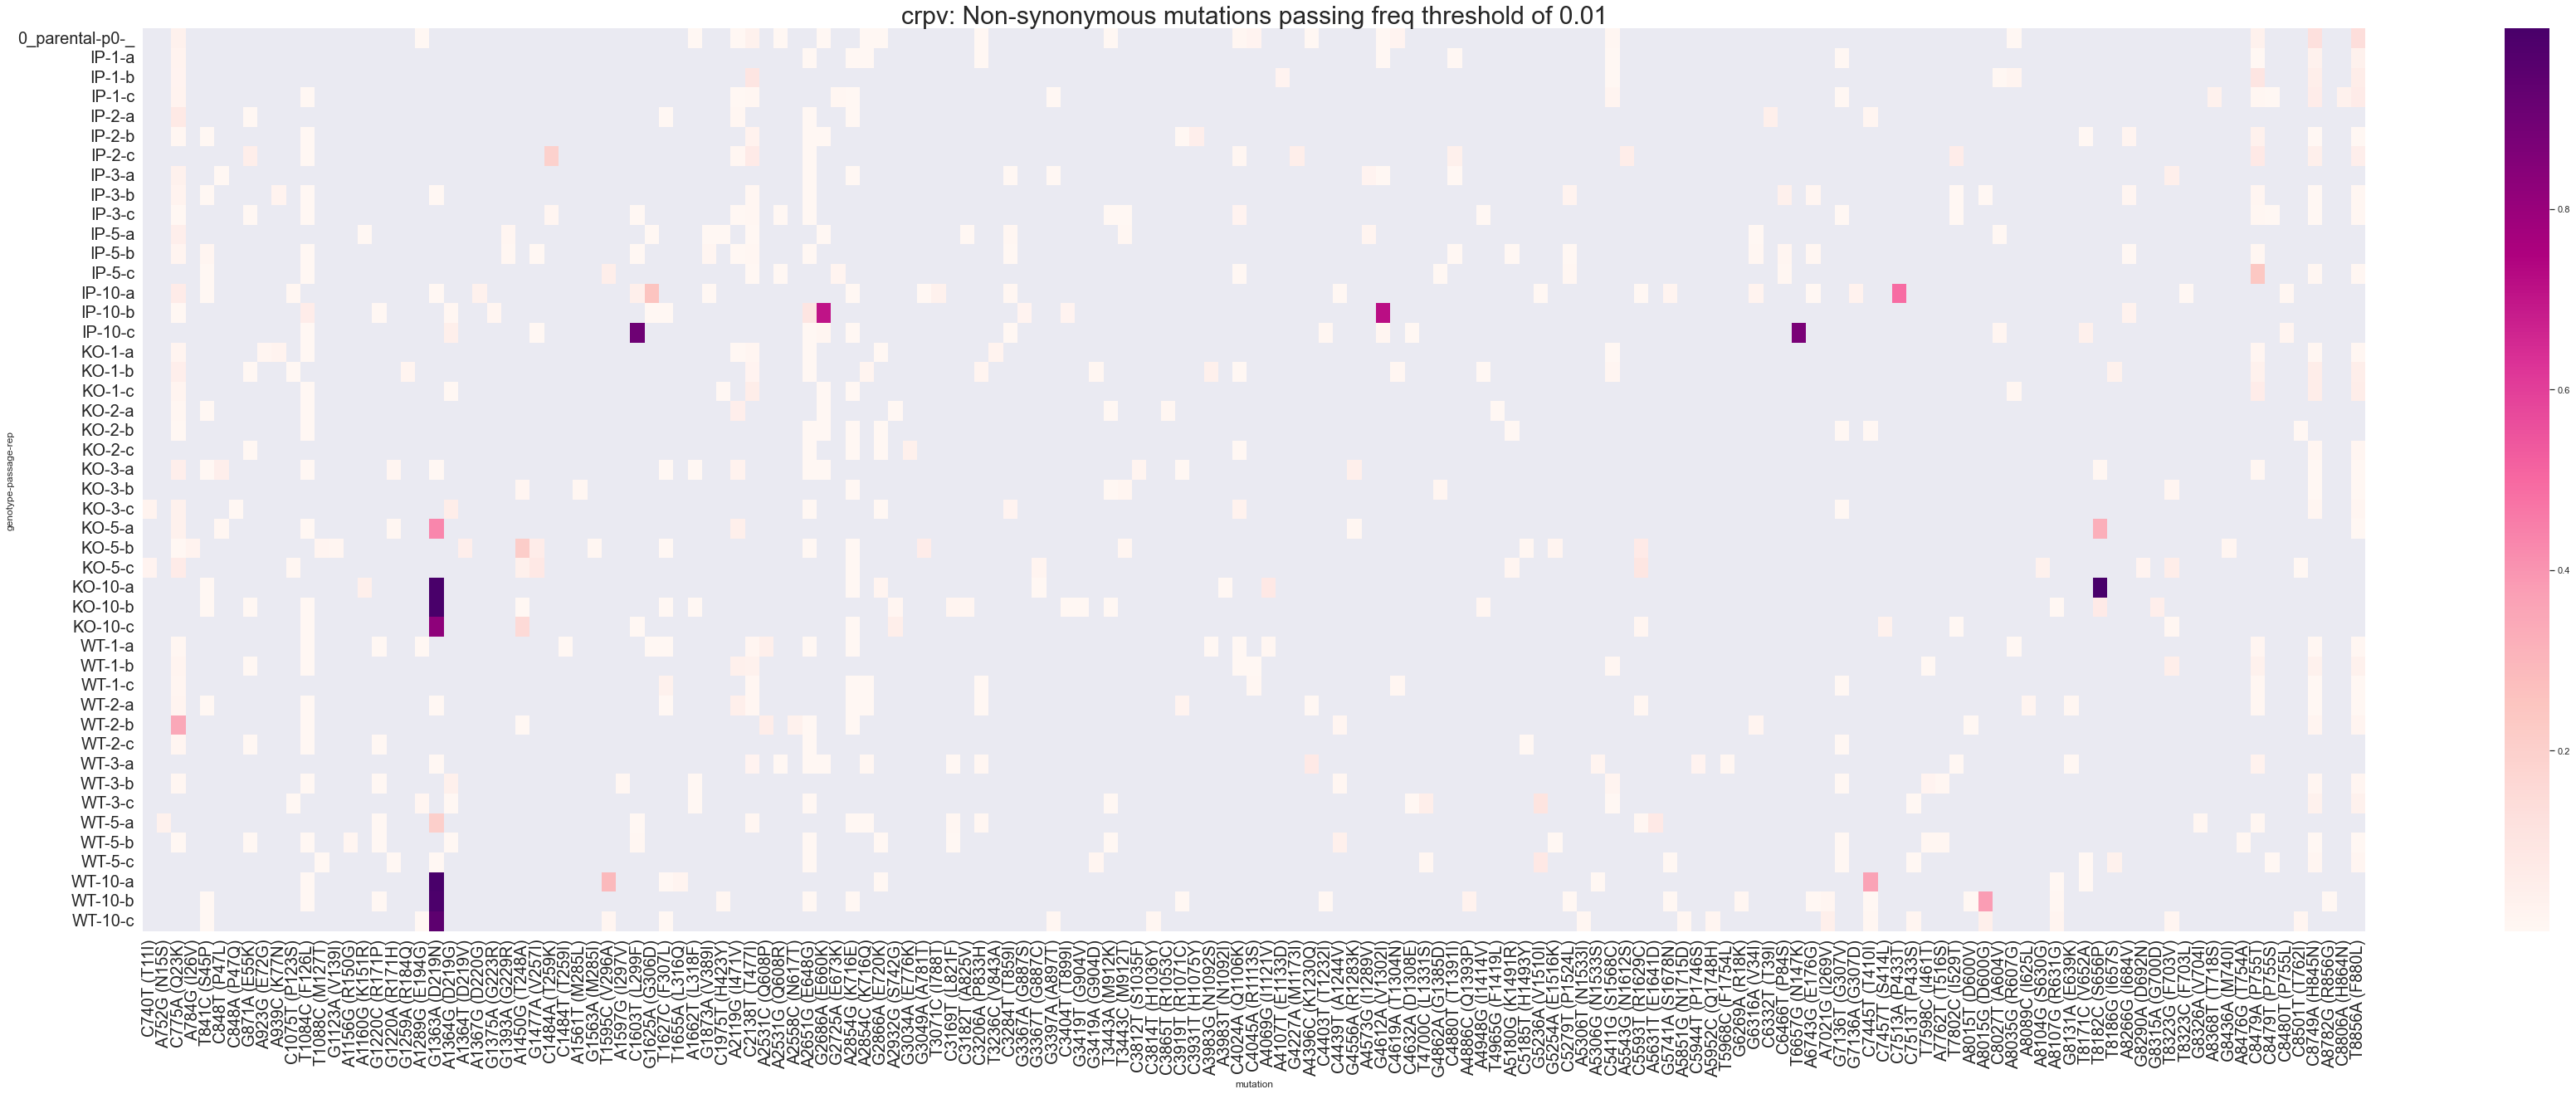

In [34]:
sns.set(rc={'figure.figsize':(60,20)})
# Pivot table 


# plot heatmap in normal scale

g = sns.heatmap(df_heatmap, xticklabels = positions, cmap="RdPu", 
                #linewidths=0.005, 
                #linecolor='white'
               )
fig = g.get_figure()
plt.xticks(rotation=90, fontsize=20)
plt.yticks( fontsize=20)
plt.title(f"{virus}: Non-synonymous mutations passing freq threshold of 0.01", fontsize=30)
plt.savefig(f"/Users/lfuhrmann/Downloads/{virus}_heatmap_NS_freq0.01.no_grid.pdf")

## non-syn minus parental mutations

In [17]:
df_NS = df[df['IsSynonymous']==0]

frequency_threshold = 0.01
df_temp = df[df['frequency']>=frequency_threshold]
high_freq_positions = df_temp['POS'].values

df_NS = df_NS[(df_NS['POS'].isin(high_freq_positions))]

In [18]:
set_muts_p0 = set(df_NS[df_NS['sample']=="parental_p0_vs_p0"]['mutation'])
len(set_muts_p0)

21

In [19]:
set_muts = set(df_NS['mutation'])
len(set_muts)

155

In [20]:
df_NS = df_NS[~(df_NS['mutation'].isin(set_muts_p0))]

# security check that we substract correctly
set_muts = set(df_NS['mutation'])
len(set_muts)

134

In [21]:
mutation_order = df_NS.sort_values('position')['mutation'].unique()

df_heatmap = df_NS.pivot_table(values='frequency', 
                                    index=[ 'genotype', 'passage', 'rep'], 
                                    columns='mutation', 
                                    aggfunc=np.max,
                                    #fill_value=0
                                   ).reindex(mutation_order, axis=1)

positions = df_heatmap.columns.to_list()

In [22]:
df_heatmap.shape

(45, 134)

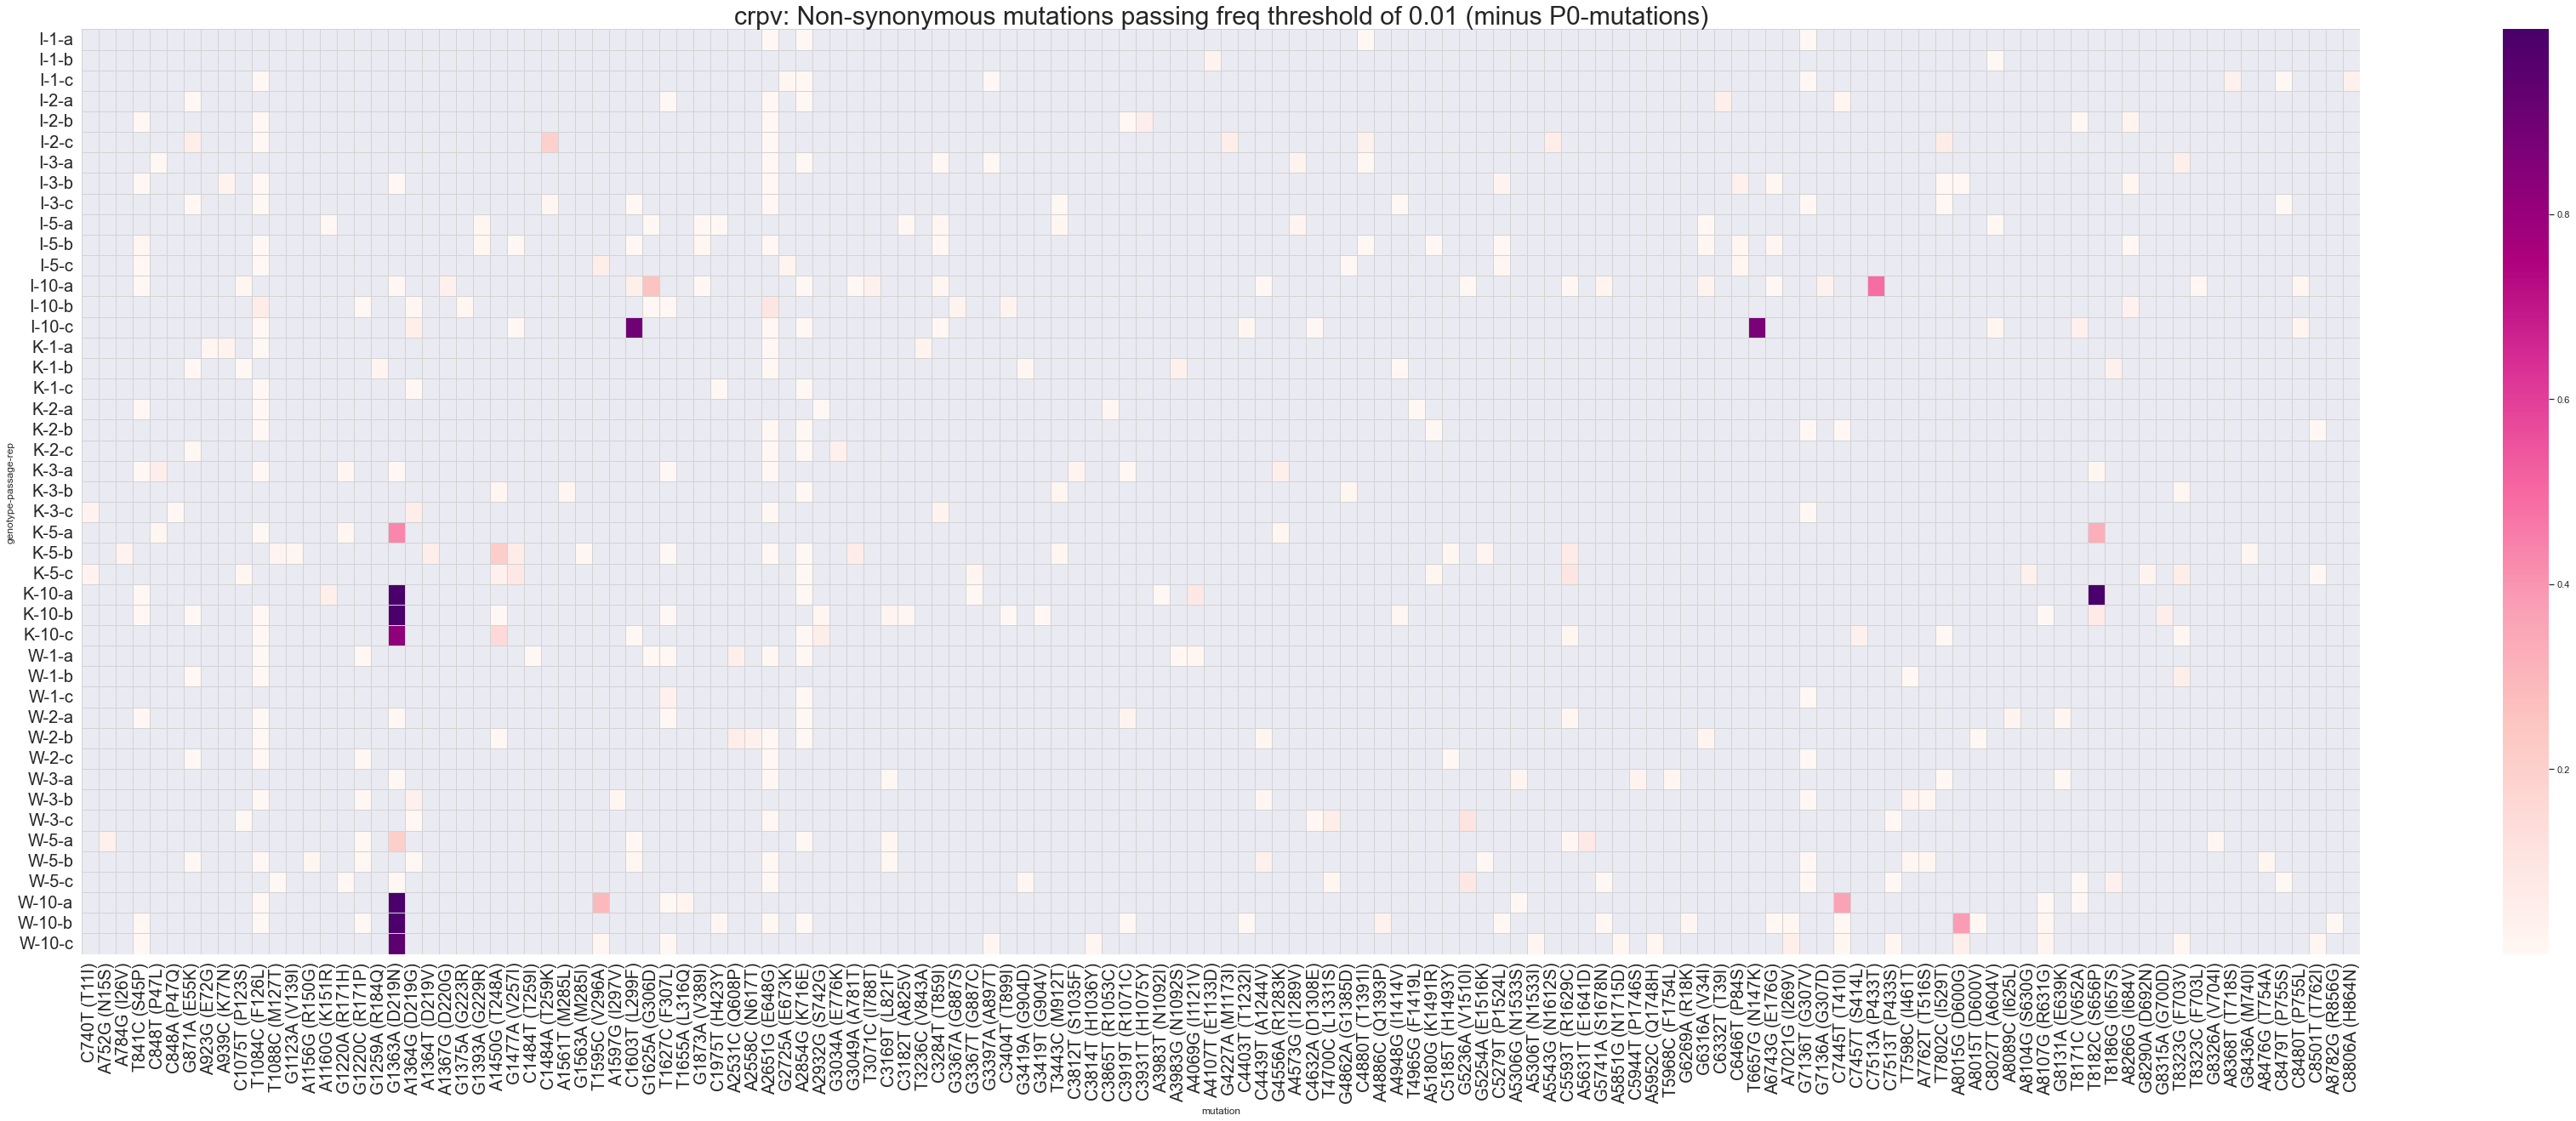

In [24]:
sns.set(rc={'figure.figsize':(60,20)})
# Pivot table 


# plot heatmap in normal scale

g = sns.heatmap(df_heatmap, xticklabels = positions, cmap="RdPu", linewidths=1, linecolor='lightgray')
fig = g.get_figure()
plt.xticks(rotation=90, fontsize=20)
plt.yticks( fontsize=20)
plt.title(f"{virus}: Non-synonymous mutations passing freq threshold of 0.01 (minus P0-mutations)", fontsize=30)
plt.savefig(f"/Users/lfuhrmann/Downloads/oscar_update/{virus}_heatmap_NS_freq0.01_minusP0.pdf")

## none non-syn

In [41]:
df['mutation'] = df['REF'] + df['POS'].astype(str) + df['ALT'] 

In [47]:
df_none_NS = df[df['IsSynonymous']!=0]

#df_none_NS = df_none_NS[df_none_NS['sample']!="parental_p0_vs_p0"]

frequency_threshold = 0.02
df_temp = df_none_NS[df_none_NS['frequency']>=frequency_threshold]
high_freq_positions = df_temp['POS'].values

df_none_NS = df_none_NS[(df_none_NS['POS'].isin(high_freq_positions))]

In [48]:
# the two mutations that are now added with the parental stock
# 'C1077A and 'C8742A'

df_none_NS[(df_none_NS['mutation'].str.startswith(('C1077', 'C8742A'))) 
     ][['mutation', 'genotype', 'passage', 'rep','frequency']]

,mutation,genotype,passage,rep,frequency
235,C8742A,0_parental,p0,_,0.020880
19560,C8742A,WT,1,a,0.000465
20019,C8742A,WT,1,c,0.006241
20490,C8742A,KO,1,b,0.008147


In [49]:
mutation_order = df_none_NS.sort_values('position')['mutation'].unique()

df_heatmap = df_none_NS.pivot_table(values='frequency', 
                                    index=[ 'genotype', 'passage', 'rep'], 
                                    columns='mutation', 
                                    aggfunc=np.max,
                                    #fill_value=0
                                   ).reindex(mutation_order, axis=1)

positions = df_heatmap.columns.to_list()

In [50]:
df_heatmap.shape

(46, 142)

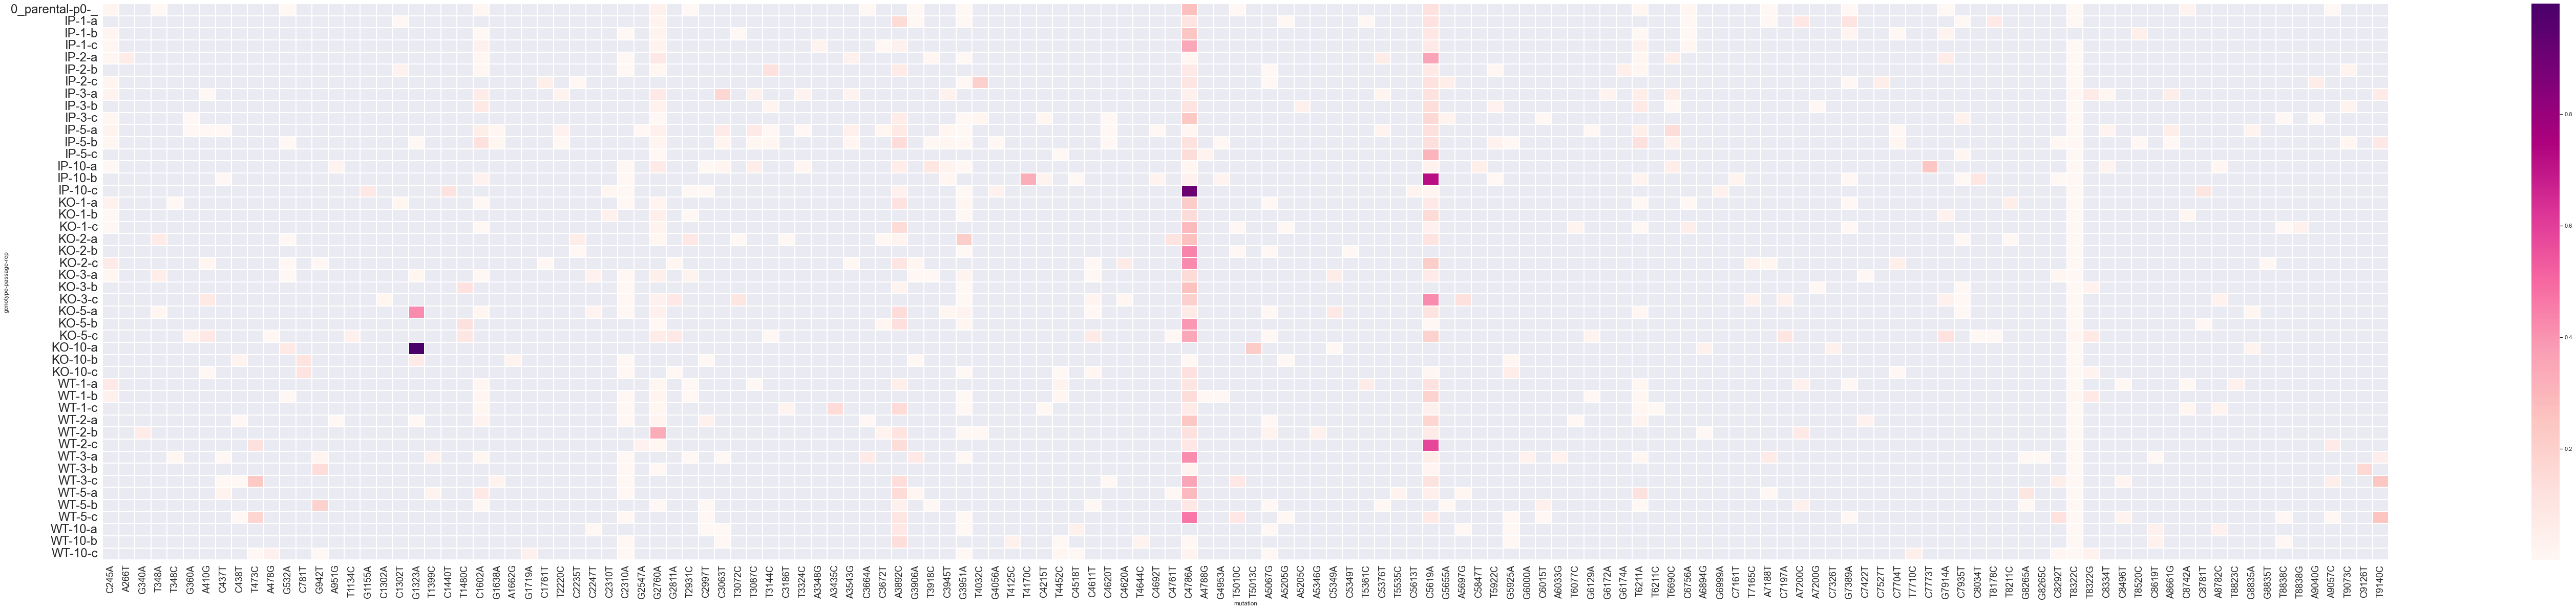

In [54]:
sns.set(rc={'figure.figsize':(100,20)})
# Pivot table 


# plot heatmap in normal scale

g = sns.heatmap(df_heatmap, xticklabels = positions, cmap="RdPu", linewidths=0.01, linecolor='white')
fig = g.get_figure()
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=24)
#plt.title(f"{virus}: NONE non-synonymous mutations passing freq threshold of 0.01", fontsize=35)
plt.savefig(f"/Users/lfuhrmann/Downloads/{virus}_heatmap_noneNS_freq0.02.png", dpi=600)

## none non-syn minus parental mutations

In [43]:
df['mutation'] = df['REF'] + df['POS'].astype(str) + df['ALT'] 

In [44]:
df_none_NS = df[df['IsSynonymous']!=0]

#df_none_NS = df_none_NS[df_none_NS['sample']!="parental_p0_vs_p0"]

frequency_threshold = 0.01
df_temp = df_none_NS[df_none_NS['frequency']>=frequency_threshold]
high_freq_positions = df_temp['POS'].values

df_none_NS = df_none_NS[(df_none_NS['POS'].isin(high_freq_positions))]

In [45]:
set_muts = set(df_none_NS['mutation'])

In [46]:
len(set_muts)

261

In [47]:
set_muts_p0 = set(df_none_NS[df_none_NS['sample']=="parental_p0_vs_p0"]['mutation'])

In [48]:
len(set_muts_p0)

28

In [49]:
df_none_NS = df_none_NS[~(df_none_NS['mutation'].isin(set_muts_p0))]

In [50]:
# security check that we substract correctly
set_muts = set(df_none_NS['mutation'])
len(set_muts)

233

In [51]:
mutation_order = df_none_NS.sort_values('position')['mutation'].unique()

df_heatmap = df_none_NS.pivot_table(values='frequency', 
                                    index=[ 'genotype', 'passage', 'rep'], 
                                    columns='mutation', 
                                    aggfunc=np.max,
                                    #fill_value=0
                                   ).reindex(mutation_order, axis=1)

positions = df_heatmap.columns.to_list()

In [52]:
df_heatmap.shape

(45, 233)

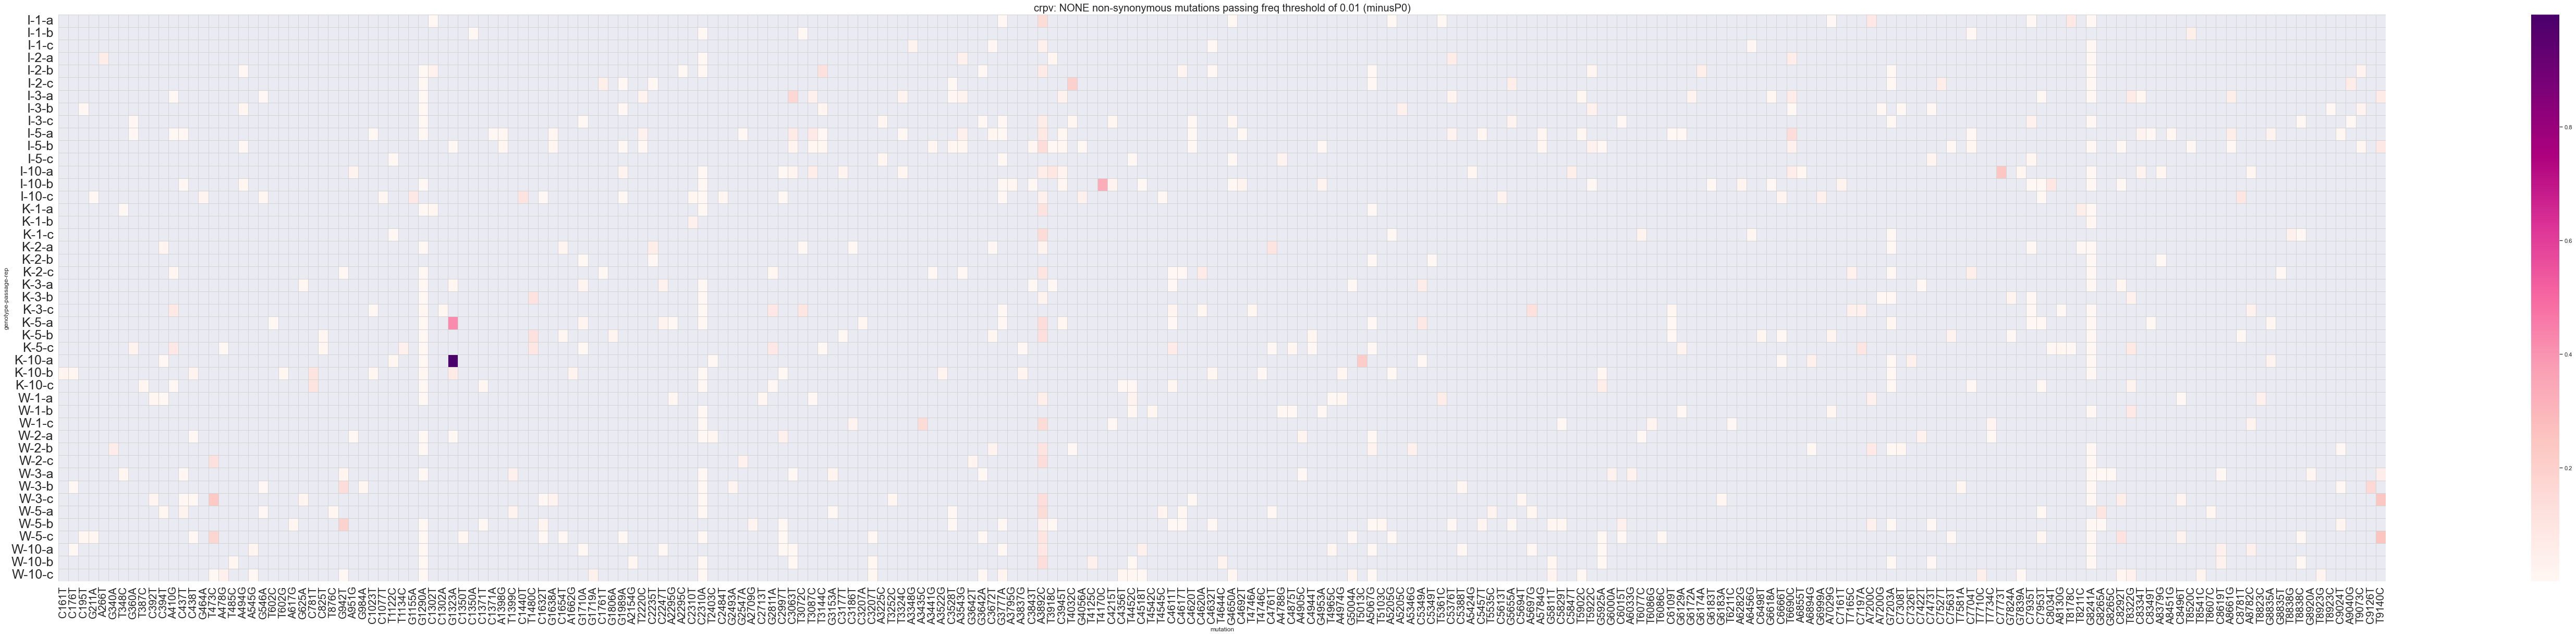

In [56]:
sns.set(rc={'figure.figsize':(100,20)})
# Pivot table 


# plot heatmap in normal scale

g = sns.heatmap(df_heatmap, xticklabels = positions, cmap="RdPu", linewidths=1, linecolor='lightgray')
fig = g.get_figure()
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=25)
plt.title(f"{virus}: NONE non-synonymous mutations passing freq threshold of 0.01 (minusP0)", fontsize=20)
plt.savefig(f"/Users/lfuhrmann/Downloads/oscar_update/{virus}_heatmap_noneNS_freq0.01_minusP0.pdf")

## all mutations heatmap (to see hitchhikers) 

In [57]:
frequency_threshold = 0.1
df_temp = df[df['frequency']>=frequency_threshold]
high_freq_positions = df_temp['POS'].values

df_all_muts = df[(df['POS'].isin(high_freq_positions))]

mutation_order = df_all_muts.sort_values('position')['mutation'].unique()

df_heatmap = df_all_muts.pivot_table(values='frequency', 
                                    index=[ 'genotype', 'passage', 'rep'], 
                                    columns='mutation', 
                                    aggfunc=np.max,
                                    #fill_value=0
                                   ).reindex(mutation_order, axis=1)

positions = df_heatmap.columns.to_list()

In [58]:
df_heatmap.shape

(46, 52)

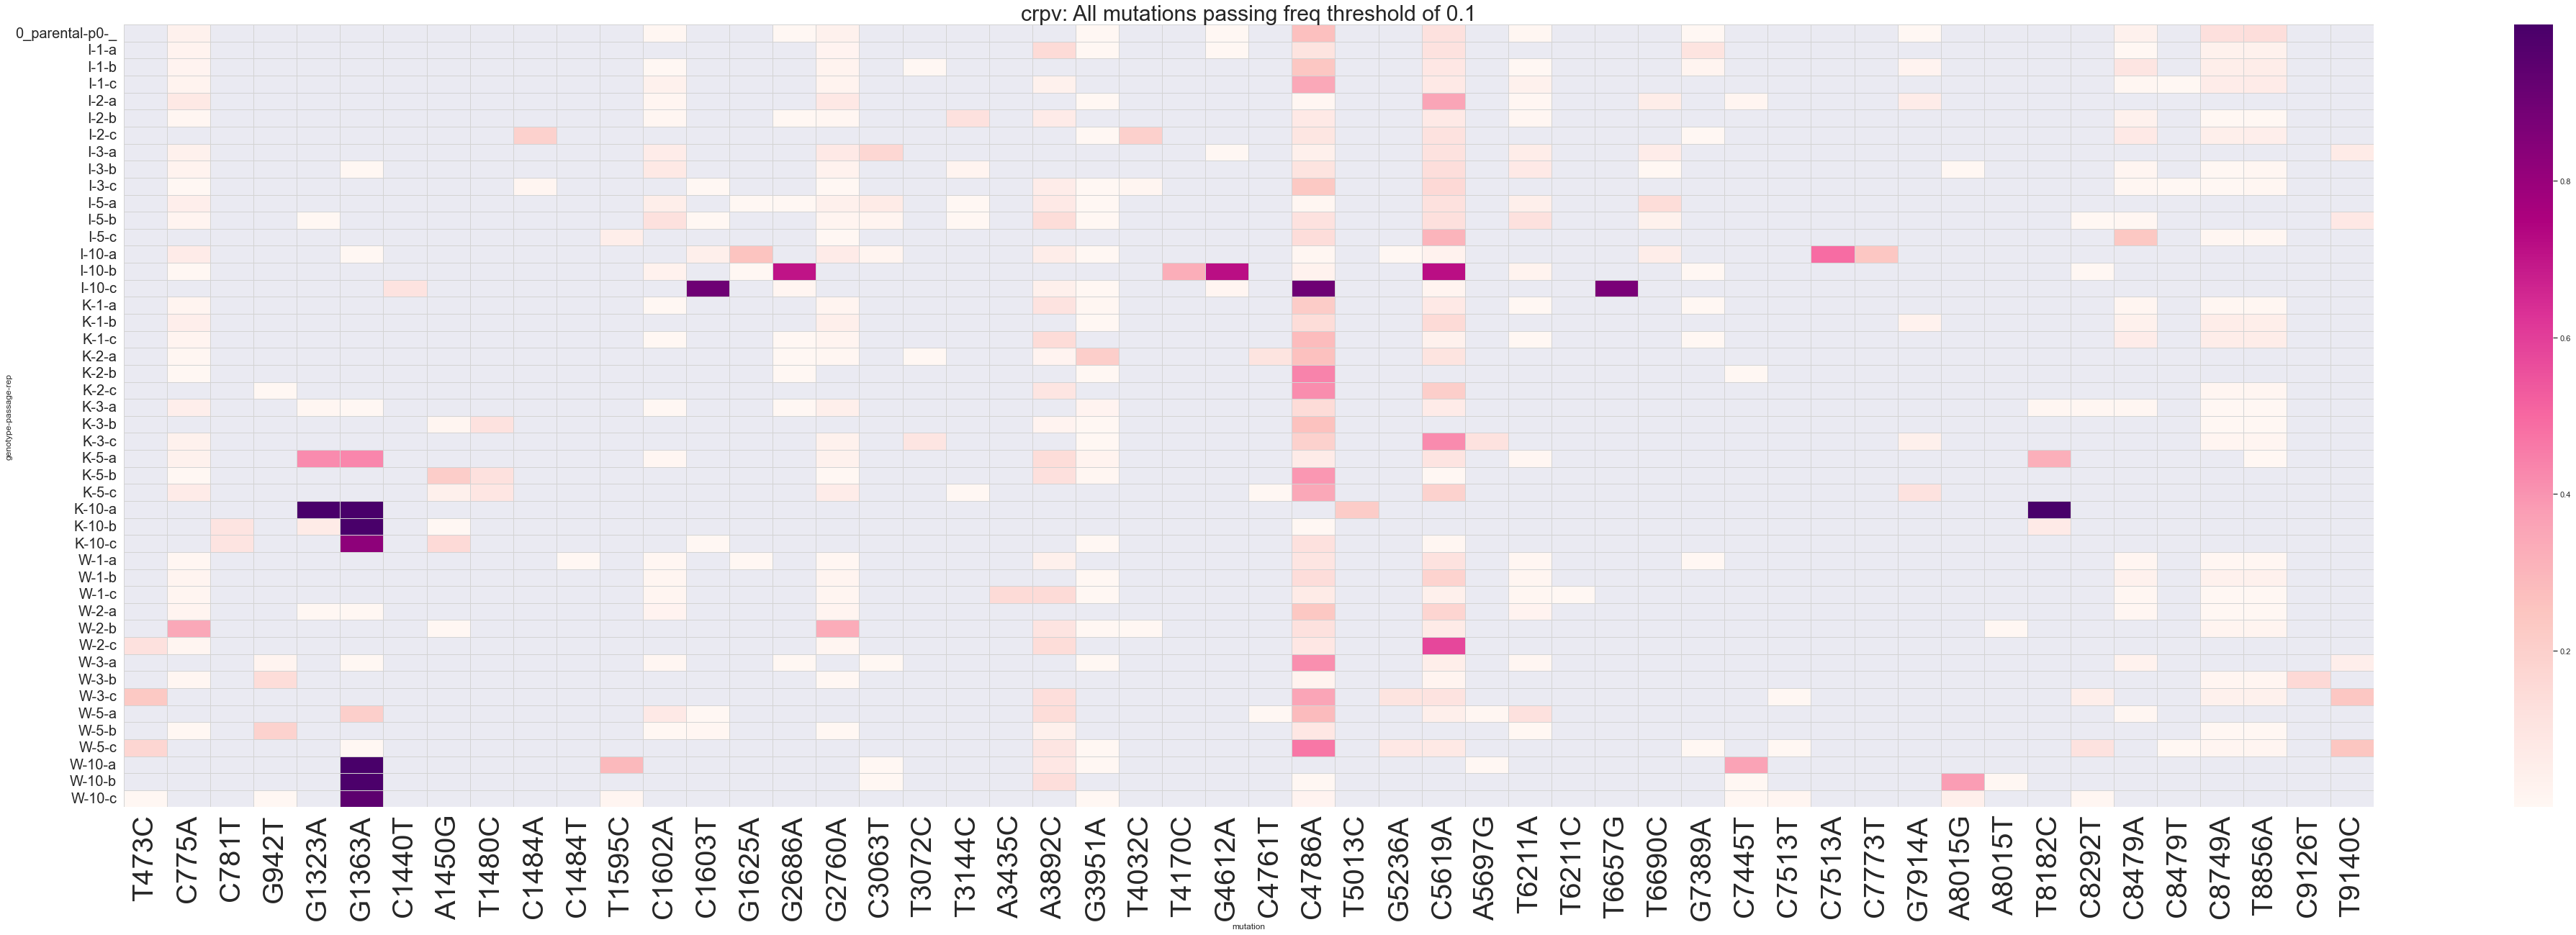

In [62]:
sns.set(rc={'figure.figsize':(70,20)})
# Pivot table 


# plot heatmap in normal scale

g = sns.heatmap(df_heatmap, xticklabels = positions, cmap="RdPu", linewidths=1, linecolor='lightgray')
fig = g.get_figure()
plt.xticks(rotation=90, fontsize=40)
plt.yticks(fontsize=20)
plt.title(f"{virus}: All mutations passing freq threshold of 0.1", fontsize=30)
plt.savefig(f"/Users/lfuhrmann/Downloads/oscar_update/{virus}_heatmap_all_muts_freq0.1.pdf")